# **Transform Photos to Sketches and Paintings with OpenCV**


Estimated time needed: **30** minutes


Have you wanted to transform your photographs in an artistic sketch or painting to showcase your creativity? Well using some built in OpenCV functions you can do exactly that! OpenCV is a powerful computer vision and image processing library. In this guided project you will learn how to transform your photos to sketches and paintings using OpenCV in python.


## Objectives:

After completing this lab, you will be able to:

*   Convert colored images to grayscale
*   Apply the Gaussian filter to smooth an image
*   Detect the edges of an image using the Gradient Magnitude
*   Convert a grayscale image to a binary image
*   Create a pencil sketch of an image in OpenCV
*   Create a water painting of an image in OpenCV

**Get ready to start!**


## Table of Contents

*   [Exercise 1: Import Libraries and Load your Images](#Exercise1)
*   [Exercise 2: Turning a Photograph into a Sketch](#Exercise2)
    *   [Task A: Convert Your Image To Grayscale](#TaskA)
    *   [Task B: Smooth Your Image](#TaskB)
    *   [Task C: Detect the Edges](#TaskC)
    *   [Task D: Get the Threshold of the Image](#TaskD)
*   [Exercise 3: Pencil Sketch Effect](#Exercise3)
*   [Exercise 4: Water Color Painting Effect](#Exercise4)
*   [Exercise 5: Experiment With Your Own Photos!](#Exercise5)
*   [Exercise 6: Practice!](#Exercise6)
    *   [Task A: Smooth an Image](#Task6A)
    *   [Task B: Get the Water Painting Image of a Colored Image ](#Task6B)
    *   [Task C: Convert a Grayscale Image to a Binary Image](#Task6C)


Before we begin this project, we will create a folder called **images** in the left hand side bar and add the image we will use to the folder.


In [1]:
import requests
import os

# Make a folder to hold our images called "images" if it doesn't already exist
!mkdir -p ./images

# To add the image we will be using to this lab to the folder
if not os.path.isfile("./images/LandscapePhotograph.jpeg"):
    r = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/transform-photos-to-sketches-and-paintings-with-opencv/images/LandscapePhotograph.jpeg")
    f = open("./images/LandscapePhotograph.jpeg", mode = "wb+")
    f.write(r.content)
    f.close()

## Exercise 1 <a id="Exercise1"></a>: Import Libraries and Load your Images


In this exercise, you will import the libraries needed for this lab and load your images.


The libraries needed for this lab is **cv2**, the OpenCV library, **matplotlib.pyplot** which is going to be used to plot our images and the **numpy** library for matrix computations.


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

The first step is to load the image file and we will do that using the **cv2.imread()** method. This method reads an image into a numpy array and takes the path of an image as its input parameter. The method returns a matrix based on the number of color channels present in the image. We will talk more about what this means to come.


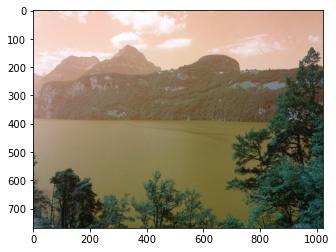

In [3]:
img = cv2.imread("./images/LandscapePhotograph.jpeg") #loading the image from the directory if you want to use your own point to your images directory
plt.imshow(img)

Images are either grayscale or colored.  A pixel defines a point in an image.  Unlike us humans, when a computer sees an image, it doesn't see shapes and colors but rather a matrix of numbers. Colored images usually have 3 color channels and are of the form BGR (Blue-Green-Red) or RGB (Red-Green-Blue). Grayscale images only have one color channel and every pixel value is a number between 0 and 255. 0 indicates the color black and 255 indicates white.

You may have noticed that when we plotted the image in the previous code cell, the colors didn't seem quite right. This is because OpenCV reads the order of the color channels in colored images as BGR, but the order of the color channels in the original image may be RGB. To correct this we can use the **cv2.cvtColor()** method with the input parameters being the image and `cv2.COLOR_BGR2RGB` to indicate that we are converting the image from the form BGR to RGB, as you see below.


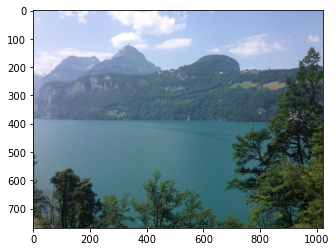

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# Exercise 2: Turning a Photograph into a Sketch


In this exercise, you will go through the steps to turn your photograph into a sketch.


### Task A <a id="TaskA"></a>: Convert Your Image To Grayscale


In the preprocessing step, colored images are oftentimes converted to grayscale to make computation faster and simpler, since grayscale images only have one color channel whereas colored images have three. Moreover, color information usually doesn't help us identify the features we are looking for. OpenCV has the method **cv2.cvtColor()** that can convert colored image to a grayscale image. Below, the first parameter, img, is the image you want to convert and the second parameter, `cv2.COLOR_BGR2GRAY`, indicates that you want to convert your image from a BGR image to a grayscale image.


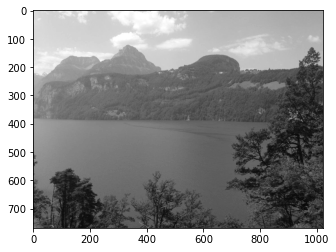

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')

### Task B <a id="TaskB"></a>:  Smooth Your Image


Oftentimes a smoothing filter is applied to the image to reduce the noise of an image. Image noise is random changes in brightness in the image. It is usually the grainy parts of your photograph. The effect of smoothing your image is making your image more blurry. A popular smoothing filter that is used is the Gaussian filter.

OpenCV has the method **cv2.GaussianBlur()** that applies the Gaussian filter to an image. The parameters the method takes is the image you want smoothed, the size of the filter (for example the parameter value of (5,5) indicates a square filter with each side being 5 pixels long), and the value of sigma. The sigma parameter controls how blurry you want your image to become.

The value of sigma is initially set to 2, try different sigma value (such as 1,5 and etc) to see the difference in the resulting image.

You will notice that the higher the value of sigma, the more blurry the resulting image becomes. You can think of it like the higher the value of sigma, the more information you are removing from the image. So you need to choose an appropriate sigma value such that important features of the image remain intact after the Gaussian filter is applied.


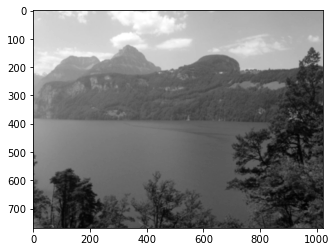

In [6]:
blur = cv2.GaussianBlur(gray,(5,5),2)
plt.imshow(blur, cmap = 'gray')

### Task C <a id="TaskC"></a>:  Detect the Edges


The edges of an image are the parts of an image where the brightness changes quickly. To detect the edges of an image, we need to compute something called the gradient magnitude of an image. The gradient magnitude of an image measures how quickly the image is changing and it is used for edge detection. To get a sketch for our photograph, we will compute the gradient magnitude of the image.

To get the gradient magnitude of an image, we need to calculate the verticle and horizontal components of the gradient of the image. In other words, we need to calculate how much the image changes in the horizontal direction (the x component of the gradient), $dx$, and the verticle direction (the y component of the gradient), $dy$. To calculate how much the image changes in the each direction, we apply a filter called the Sobel filter to the images. To do this in OpenCV, we use the method **cv2.Sobel()**.

The formula for the gradient magnitude is $\sqrt {\left( {dx} \right)^2 + \left( {dy} \right)^2 }$.


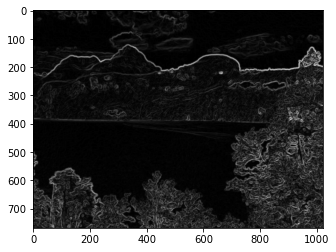

In [7]:
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5) # Change in horizonal direction, dx
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5) # Change in verticle direction, dy
gradmag_sq = np.square(sobelx)+np.square(sobely) # Square the images element-wise and then add them together 
gradmag = np.sqrt(gradmag_sq) # Take the square root of the resulting image element-wise to get the gradient magnitude

plt.imshow(gradmag, cmap ='gray')

We will now reverse colors of the gradient magnitude of the image. In other words, we want to make the light regions dark and the dark regions light. Lighter regions have a pixel value closer to 255, which is the value for white, and darker regions have a pixel value closer to 0, which is the value for black. To reverse the colors of the gradient magnitude we will replace every pixel value with the pixel value subtracted from 255 since 255 is the maximum possible pixel value in a grayscale image.


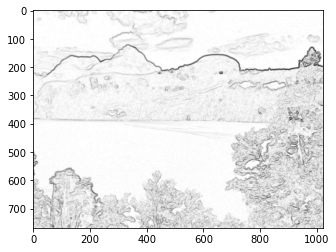

In [8]:
gradmag_inv = 255-gradmag # Reverse the colors in the image
plt.imshow(gradmag_inv, cmap = "gray")

### Task D <a id="TaskD"></a>: Get the Threshold of the Image


Thresholding is a method used to turn an image from grayscale (pixel value from 0 - 255) into a binary image. A binary image is an image where every pixel has one of two possible values, usually a value of 0 (black) or 255 (white). The way the algorithm typically works is that for given threshold value that ranges from 0 to 255, if the pixel value is less than the threshold value it is mapped to 0 (black) and if the pixel value is greater than the threshold value then the pixel value is mapped to the maximum value, usually 255 (white). 

If you want to have a sketch of your photo where the only colors are black and white, you can take the threshold of your image. OpenCV  has a method for getting the threshold of an image called **cv2.threshold()**. This method returns a tuple where the first element of the tuple is the threshold value and the second is the thresholded image. For the thresholding method we will be using in this task, we will be supplying the threshold value in the input but there are other forms of thresholding where the threshold value needs to be computed.

The parameters of this method are `src`, `thres`, `maxval` and `type`. `src` is a grayscale image, `thres` is your threshold value, `maxval` is the maximum value you are assigning to a pixel and `type` is the type of thresholding you want to use. As you will see in the code cell below, the threshold value we have set is 10, the maximum value is 255 and the the thresholding method we have set is `cv2.THRESH_BINARY`. `cv2.THRESH_BINARY` just indicates that if the pixel value is less than the threshold value then set the value to 0, otherwise set the value to 255.


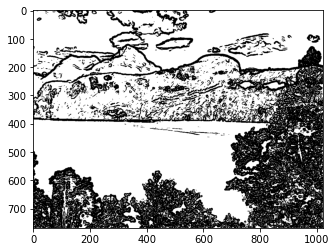

In [11]:
thresh_value, thresh_img = cv2.threshold(gradmag_inv,10,255,cv2.THRESH_BINARY)
plt.imshow(thresh_img, cmap = 'gray')

## Exercise 3 <a id="Exercise3"></a>: Pencil Sketch Effect


In this exercise, you will use OpenCV's **cv2.pencilSketch()** method to turn your photo into a pencil sketch.

The method **cv2.pencilSketch()** returns both a gray and colored pencil sketch of the input image. The input image we will be using is our original colored image from Exercise 1 that the colors looked as they should, img_rgb. You will notice in the code below that the method takes in other parameters as well, `sigma_s`, `sigma_r` and `shade_factor`.

*   `sigma_s`, a value from 0-200, determines how smooth you want the resulting image to become. The higher the value of `sigma_s` the smoother the image.

*   `sigma_r`, a value from 0-1, determines how much you want different colors in your image to be blended. A small `sigma_r` value indicates that you only want regions of similar color to be smooth while the different colors remain intact. This parameter is important when you want to preserve the edges of an image when you are smoothing it.

*   The `shade_factor` is a value between 0-0.1. The higher the value of the `shade_factor` the brighter the image.

We have set an initial value for these parameters in the code below, but play around with these parameters and see how to resulting image changes for yourself!


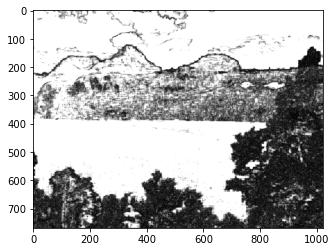

In [12]:
pencilsketch_gray, pencilsketch_color  = cv2.pencilSketch(img_rgb, sigma_s=60, sigma_r=0.07, shade_factor=0.05) 

plt.imshow(pencilsketch_gray, cmap ='gray') # To plot the black and white pencil sketch

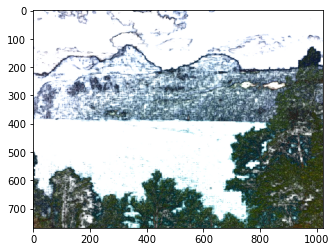

In [13]:
plt.imshow(pencilsketch_color) # To plot the colored sketch

## Exercise 4 <a id="Exercise4"></a>: Water Color Painting Effect


In this exercise, you will use OpenCV's  **cv2.stylization()** method to give your images a water color painting effect.

Like the **cv2.pencilSketch()** method, the **cv2.stylization()** method takes in parameter values of `sigma_s` and `sigma_r`.Moreover, the input image we will be using is our original colored image from Exercise 1, img_rgb. As defined in the previous exercise:

*   `sigma_s` determines how smooth you want the resulting image to become. The higher the value of `sigma_s` the smoother the image.

*   `sigma_r` determines how much you want different colors in your image to be blended. A small `sigma_r` value indicates that you only want regions of similar color to be smooth while the different colors remain intact. This parameter is important when you want to preserve the edges of an image when you are smoothing it.

Experiment with different parameter values for `sigma_s` and `sigma_r` for your image and see which one you think looks best!


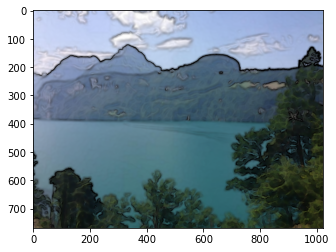

In [14]:
waterpainting = cv2.stylization(img_rgb, sigma_s=3, sigma_r=3)
plt.imshow(waterpainting)

## Exercise 5  <a id="Exercise5"></a>: Experiment With Your Own Photos!


In this exercise, repeat this Exercises 1-4 in this lab but with your own colored photograph!

The first step is to upload your photograph (a .jpeg, .jpg or .png file) to the **images** folder in the left hand side bar. To do this, go to the data folder and then select the upload button to upload your image. We have highlighted the highlighted button in red in the image below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/transform-photos-to-sketches-and-paintings-with-opencv/images/uploadImageFolder.jpeg">

After you uploaded your image to the **images** folder, in Exercise 1 when loaded our image, replace the image path in the **cv2.imread()** method with that of your own photograph. The path to your image should be "./images/< insert name of your image file >" if your image is in the **images** folder you created prior to Exercise 1.

Throughout the exercises, try changing up the parameter values to develop a better understanding of the process and find parameter values that you think will create the best painting or sketch of your photograph. The parameters chosen were those that seemed to work well in general, but they may not be the best parameters for your own photograph.


## Exercise 6 <a id="Exercise6"></a>: Practice!


In this Exercise, you will practice applying what you have learned throughout Exercises 1-4.

The images we will use for the task will be from the **data** module of the **skimage** library that contains standard test images. In the code cell below we will import the **data** module of the **skimage** library.


In [15]:
from skimage import data

### Task A <a id="Task6A"></a>: Smooth an Image

In this task you must smooth the motorcycle image using the correct OpenCV method that you will see by running the code cell below. Set the sigma value to 5 and set the filter size to have height and width of 7.


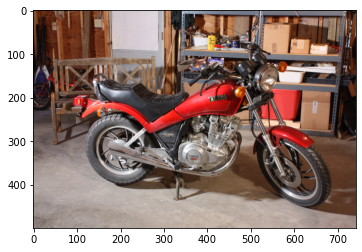

In [16]:
motorcycle = data.stereo_motorcycle()[0] #calling data.stereo_motorcycle() gives us a tuple with 2 motercycle images, we will just use the first one
plt.imshow(motorcycle)

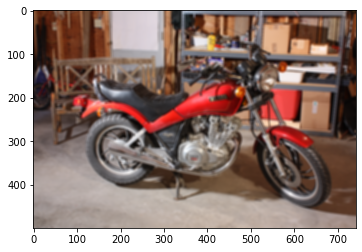

In [17]:
smoothed_motorcycle = # Write your code here
plt.imshow(smoothed_motorcycle)

<details>
    <summary>Click here for Hint</summary>

```
 Refer to Exercise 2 Task B and set the sigma parameter to 5 and the parameter for the filter size to (7,7)
```

</details>

<details>
    <summary>Click here for Solution</summary>

```
 smoothed_motorcycle = cv2.GaussianBlur(motorcycle,(7,7),5)
```

</details>


### Task B <a id="Task6B"></a>: Get the Water Painting Image of a Colored Image

In this task you will convert a colored image to a water painting. For this task we will be using the same colored motorcycle image, `motorcyle`, as Task A of this Exercise. Set the `sigma_s` value to 7 and the `sigma_r` value to 2 for your final solution but also experiment with differen`sigma_s` and `sigma_r` values to see how your resulting image changes.


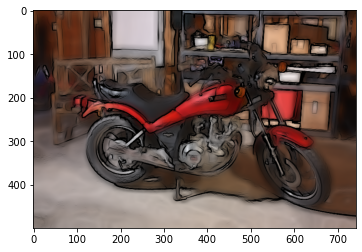

In [18]:
motorcycle_waterpainting =# Write your code here
plt.imshow(motorcycle_waterpainting)

<details>
    <summary>Click here for Hint</summary>

```
 Refer to Exercise 4. Set the value of sigma_r to 2  and the value of sigma_s to 7.
```

</details>

<details>
    <summary>Click here for Solution</summary>

```
 motorcycle_waterpainting = cv2.stylization(motorcycle, sigma_s=7, sigma_r=2)
```

</details>


### Task C <a id="Task6C"></a>: Convert a Grayscale Image to a Binary Image

In this task you will convert the grayscale image of a camera man, that you will see by running the code cell below, into a binary image where every pixel is 0 or 255 by taking the threshold of the image. Set the threshold value to 85 for this task, but also try out different threshold values (such as 20, 120 etc) to see how the image changes as you adjust your threshold value.


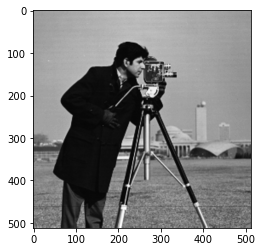

In [19]:
camera_man = # Write your code here
plt.imshow(camera_man, cmap = 'gray')

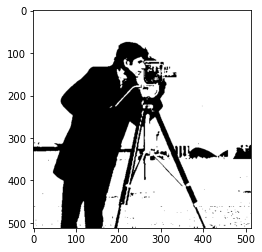

In [20]:

thresh_value, binary_img = # Write your code here
plt.imshow(binary_img , cmap = 'gray')

<details>
    <summary>Click here for Hint</summary>

```
 Refer to Exercise 2 Task D. Set the threshold value to 85, the maximum value to 255 and the thresholding method  to cv2.THRESH_BINARY.
```

</details>

<details>
    <summary>Click here for Solution</summary>

```
 thresh_value, binary_img = cv2.threshold(camera_man,85,255,cv2.THRESH_BINARY)
```

</details>


## Authors


[Isaac Gazimbe](https://www.linkedin.com/in/isaac-gazimbe-2154b015b/)



##Enjoy your learning##